In [1]:
import pandas as pd
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [21]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [22]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

##### frequency with every feature

In [39]:
df.groupby(['BsmtQual'])['BsmtQual'].count()


BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [42]:
df['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

<Axes: xlabel='GarageType'>

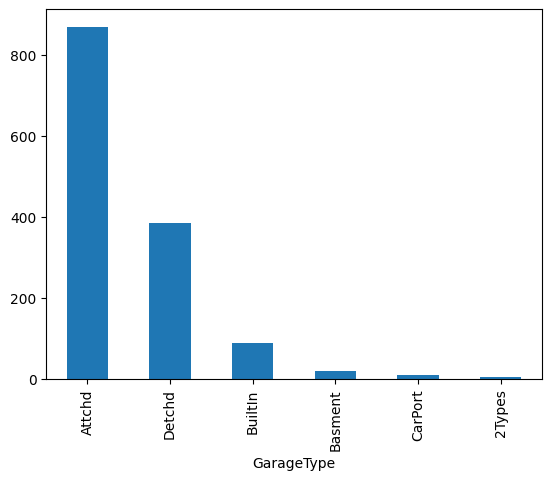

In [48]:
df['GarageType'].value_counts()
df['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

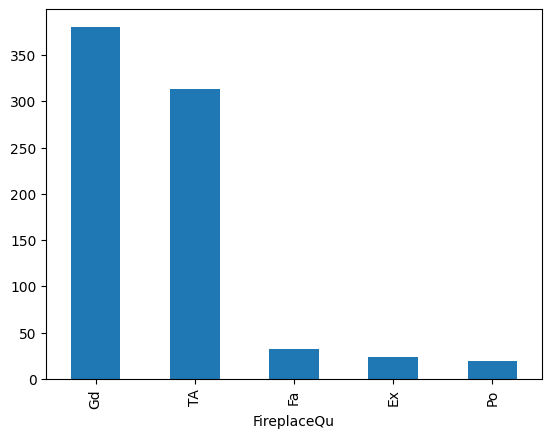

In [49]:
df['FireplaceQu'].value_counts().plot.bar()

In [50]:
def impute_nan(df,variable):
    most_frequent_val = df[variable].mode()
    df[variable].fillna(most_frequent_val,inplace=True)



#### capturing importance of missing value

In [53]:
df = pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0);
df['GarageType_var'] = np.where(df['GarageType'].isnull(),1,0);
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0);

def impute_nan(df,variable):
    most_frequent_val = df[variable].mode()
    df[variable].fillna(most_frequent_val,inplace=True)


impute_nan(df,'BsmtQual')
impute_nan(df,'FireplaceQu')
impute_nan(df,'GarageType')


df.head()

C:\Users\dushy\AppData\Local\Temp\ipykernel_27688\2670192595.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_val,inplace=True)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,GarageType_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,0,1
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


#### suppose we have more frequent category we just replace it with new category

In [59]:
df = pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
def impute_nan(df,variable):
  df[variable] = np.where(df[variable].isnull(),'missing',df[variable])

impute_nan(df,'FireplaceQu')

df.head()



,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


##### one hot encoding

In [65]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
pd.get_dummies(df['Sex'],drop_first=True).head()


,male
0,True
1,False
2,False
3,False
4,True


In [ ]:
#                                                                                        #####            important              #######

# for many categorical feature we user a technique to select top 10 most frequent and apply one hot encoding